In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

In [2]:
import csv

In [3]:
filename='files/3367OS_02_Code/ch02-data.csv'

In [4]:
data=[]

In [5]:
try:
    with open(filename) as f: # no need to close if use with statement
        reader=csv.reader(f)
        header=next(reader)
        data=[row for row in reader] #skip over the header line, if any
except csv.Error as e:
    print ("Error reading CSV file at line %s: %s" % (reader.line_num, e))
    sys.exit(-1) #exit with code -1

In [6]:
if header:
    print(header)
    print('==========================')
for row in data:
    print(row)

['day', 'ammount']
['2013-01-24', '323']
['2013-01-25', '233']
['2013-01-26', '433']
['2013-01-27', '555']
['2013-01-28', '123']
['2013-01-29', '0']
['2013-01-30', '221']


In [7]:
!head files/3367OS_02_Code/ch02-data-write.csv

In [8]:
#xlsx
import xlrd

In [9]:
file='files/3367OS_02_Code/ch02-xlsxdata.xlsx'
wb=xlrd.open_workbook(filename=file)
ws=wb.sheet_by_name('Sheet1')
dataset=[]
for r in range(ws.nrows):
    col=[]
    for c in range(ws.ncols):
        col.append(ws.cell(r,c).value)
    dataset.append(col)
from pprint import pprint
pprint(dataset)

[[28.0,
  65.0,
  '0.833730025131149-0.988897705762865i',
  '3.85373803791938-27.0168132580039i',
  120.0,
  0.23,
  72.0,
  9.0,
  1.4000000000000001,
  1.25,
  6.023029280112979,
  3.141,
  'CDXCIX',
  1.22514845490862e-16,
  1.7724538509055159,
  0.8427007351745552],
 [4.0,
  0.8427007351745552,
  '5+12i',
  '1.09868411346781+0.455089860562227i',
  1.0,
  1.0,
  3402.0,
  -9.0,
  2.0,
  380.8865742483644,
  5.0,
  -3.1,
  'LDVLIV',
  1.0,
  2.5066282746310002,
  0.0],
 [97.0,
  0.15729926482544476,
  '1.46869393991589+2.28735528717884i',
  '8+i',
  1.0,
  12.0,
  0.9999999999999998,
  1259.999999999999,
  4.0,
  761.7731484967288,
  0.0,
  31400.0,
  'XDIX',
  0.49999999999999994,
  5.0,
  101.98166642847517],
 [0.981666428475166,
  1.0,
  '0.346573590279973+0.785398163397448i',
  '8+i',
  1.0,
  1.0,
  -3.0,
  3.0,
  2.0,
  380.8865742483644,
  2.2,
  4.0,
  'VDIV',
  0.49999999999999994,
  21.0,
  ''],
 [0.2773878036322587,
  1.0,
  '0.150514997831991+0.34109408846046i',
  0.24,
 

In [10]:
# read from fixed width data
import pandas as pd
datafile='files/3367OS_02_Code/ch02-fixed-width-1M.data'
df=pd.read_fwf(datafile,widths=[9,14,5],header=None) # notice the data
df.head()

,0,1,2
0,161322597,386544351896,42
1,296411327,6945080785634,2301
2,164726383,4090941067228,5553
3,575768002,4862349192103,5643
4,483535208,6007251611732,4649


In [11]:
%who

c	 col	 csv	 data	 datafile	 dataset	 df	 f	 file	 
filename	 header	 mpl	 np	 pd	 plt	 pprint	 r	 reader	 
row	 wb	 ws	 xlrd	 


In [12]:
def is_outlier(points,threshold=3.5):
    if len(points.shape)==1:
        points=points[:,None]
    median=np.median(points,axis=0)
    diff=np.sum((points-median)**2,axis=1)
    diff=np.sqrt(diff)
    med_abs_deviation=np.median(diff)
    modified_z_score=0.6745*diff/med_abs_deviation
    return modified_z_score > threshold

In [13]:
x=np.random.random(100)
buckets=50
x=np.r_[x,-49,95,100,-100]

In [14]:
filtered=x[~is_outlier(x)]

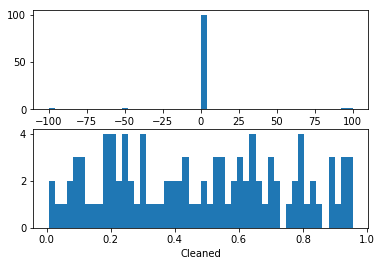

In [15]:
plt.figure()
plt.subplot(211)
plt.hist(x,buckets)
plt.xlabel('Raw')

plt.subplot(212)
plt.hist(filtered,buckets)
plt.xlabel('Cleaned')

In [16]:
from pylab import *

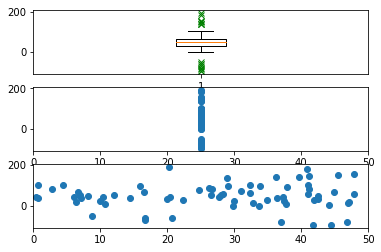

In [17]:
spread=rand(50)*100
center=ones(25)*50
flier_high=rand(10)*100+100
flier_low=rand(10)*-100
data=concatenate((spread,center,flier_high,flier_low),0)
subplot(311)
boxplot(data,0,'gx')
#
subplot(312)
spread_1=concatenate((spread,flier_high,flier_low),0)
center_1=ones(70)*25
scatter(center_1,spread_1)
xlim([0,50])
#
subplot(313)
center_2=rand(70)*50
scatter(center_2,spread_1)
xlim([0,50])
show()

processing images

In [18]:
import scipy.misc
import matplotlib.pyplot as plt

In [19]:
lena=scipy.misc.face()

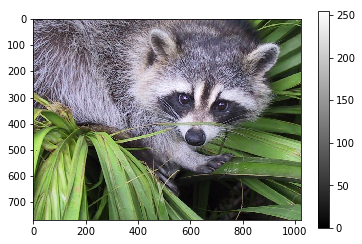

In [20]:
plt.gray()
plt.imshow(lena)
plt.colorbar()
plt.show()

In [21]:
print (lena.shape)
print(lena.max())
print(lena.dtype)

(768, 1024, 3)
255
uint8


pillow

In [22]:
from PIL import Image
import matplotlib.pyplot as plt

In [23]:
bug=Image.open('files/3367OS_02_Code/stinkbug.png')
arr=np.array(bug.getdata(),np.uint8).reshape(bug.size[1],bug.size[0],3)


In [24]:
bug.size

(500, 375)

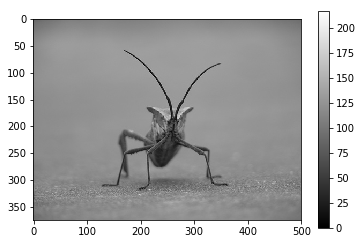

In [25]:
plt.gray()
plt.imshow(arr)
plt.colorbar()
plt.show()

In [35]:
bug=scipy.misc.imread('files/3367OS_02_Code/stinkbug.png')
bug.shape


(375, 500, 3)

In [ ]:
bug=bug[:,:,0]

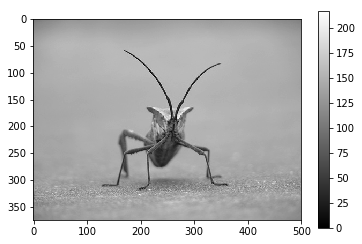

In [47]:
plt.gray()
plt.imshow(bug)
plt.colorbar()
plt.show()

In [38]:
#cache file in memory
file='files/3367OS_02_Code/stinkbug.png'
image=np.memmap(file,dtype=np.uint8,shape=(375,500,3))

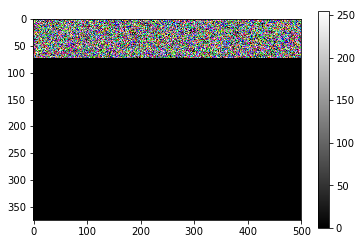

In [41]:
plt.gray()
plt.imshow(image)
plt.colorbar()
plt.show()

Generate Random datasets

In [42]:
import pylab,random

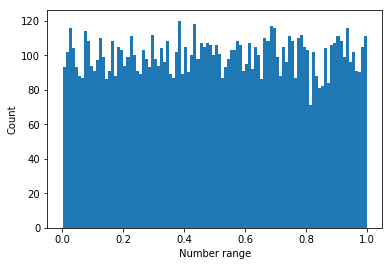

In [52]:
SAMPLE_SIZE=10000

random.seed() #use current time as seed

real_rand_vars=[]

real_rand_vars=[random.random() for val in range(SAMPLE_SIZE)]
pylab.hist(real_rand_vars,100)
pylab.xlabel('Number range')
pylab.ylabel('Count')

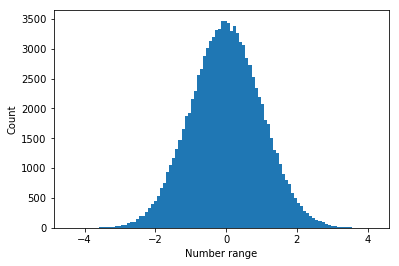

In [54]:
SAMPLE_SIZE=100000
random.seed() #use current time as seed
real_rand_vars=[]
real_rand_vars=[random.normalvariate(0,1) for val in range(SAMPLE_SIZE)]
pylab.hist(real_rand_vars,100)
pylab.xlabel('Number range')
pylab.ylabel('Count')

In [59]:
#read random words from unix
with open('/usr/share/dict/words','rt') as f:
    words=f.readlines()
words=[w.rstrip() for w in words]
print(len(words))
for w in random.sample(words,5):
    print (w)

99171
valedictories
prosperity
frothing
steadily
downtrodden


Smoothing

In [60]:
from pylab import *
from numpy import *
def moving_average(interval,window_size):
    window=ones(int(window_size))/float(window_size)
    return convolve(interval,window,'same')

In [61]:
t=linspace(-4,4,100)
t

array([-4.        , -3.91919192, -3.83838384, -3.75757576, -3.67676768,
       -3.5959596 , -3.51515152, -3.43434343, -3.35353535, -3.27272727,
       -3.19191919, -3.11111111, -3.03030303, -2.94949495, -2.86868687,
       -2.78787879, -2.70707071, -2.62626263, -2.54545455, -2.46464646,
       -2.38383838, -2.3030303 , -2.22222222, -2.14141414, -2.06060606,
       -1.97979798, -1.8989899 , -1.81818182, -1.73737374, -1.65656566,
       -1.57575758, -1.49494949, -1.41414141, -1.33333333, -1.25252525,
       -1.17171717, -1.09090909, -1.01010101, -0.92929293, -0.84848485,
       -0.76767677, -0.68686869, -0.60606061, -0.52525253, -0.44444444,
       -0.36363636, -0.28282828, -0.2020202 , -0.12121212, -0.04040404,
        0.04040404,  0.12121212,  0.2020202 ,  0.28282828,  0.36363636,
        0.44444444,  0.52525253,  0.60606061,  0.68686869,  0.76767677,
        0.84848485,  0.92929293,  1.01010101,  1.09090909,  1.17171717,
        1.25252525,  1.33333333,  1.41414141,  1.49494949,  1.57

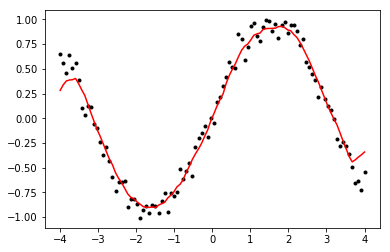

In [65]:
y=sin(t)+randn(len(t))*0.1
plot(t,y,"k.")

y_av=moving_average(y,10)

plot(t,y_av,"r")